In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
import numpy as np

# Generate sample data
np.random.seed(42)
house_sqft = np.random.randint(800, 3500, 20)
house_price = 50000 + house_sqft * 150 + np.random.randint(-20000, 20000, 20)

# Create DataFrame
df = pd.DataFrame({
    'SquareFeet': house_sqft,
    'Price': house_price
})

df.head()

,SquareFeet,Price
0,1660,296568
1,2094,363869
2,1930,348193
3,1895,320646
4,2438,423180


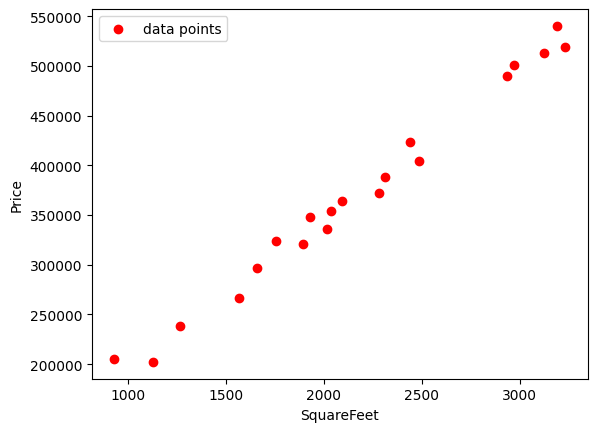

In [13]:
# plotting the data

plt.scatter(df.SquareFeet, df.Price, color = 'red', label = 'data points')
plt.xlabel('SquareFeet')
plt.ylabel('Price')
plt.legend()

Text(0.5, 1.0, 'm value 50 with MSE 63240237804.45')

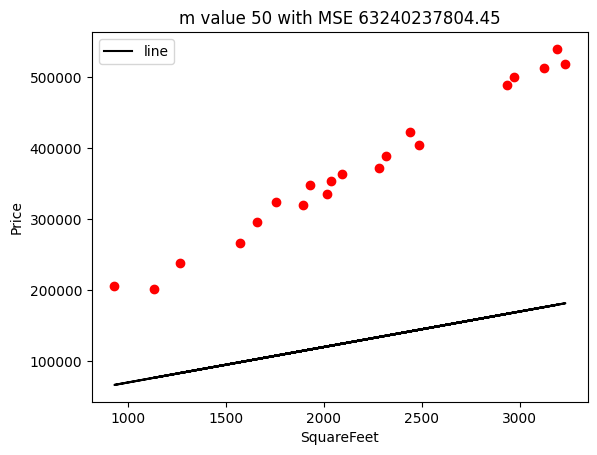

In [30]:
#m = 150
#b = 46724
from sklearn.metrics import mean_squared_error as mse
m = 50
b = 20000


# to store predicted points
predicted_val = []

# generating predictions y = mx + b for every data point
for i in range(len(df)):
    predicted_val.append(df.SquareFeet[i]*m + b)

# Plotting the line
plt.scatter(df.SquareFeet, df.Price, color = 'red')
plt.plot(df.SquareFeet, predicted_val, color = 'black', label = 'line')
#plt.xlim(1,4.5)
#plt.ylim(1,7)
plt.xlabel('SquareFeet')
plt.ylabel('Price')
plt.legend()

MSE = mse(df.Price, predicted_val)

plt.title("m value "+str(m)+" with MSE "+ str(MSE))


Text(0.5, 1.0, 'm value 150 with MSE 162534494.45')

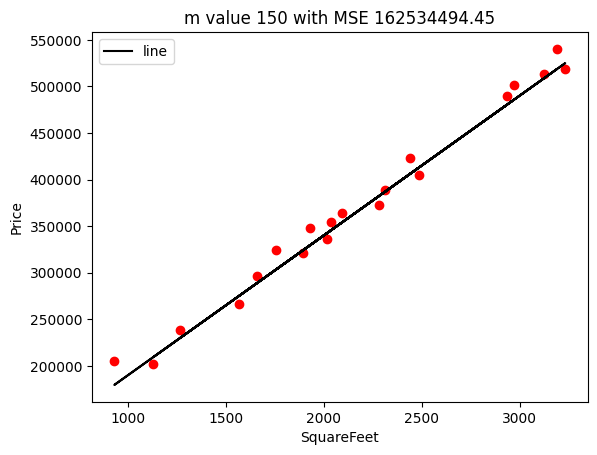

In [31]:
from sklearn.metrics import mean_squared_error as mse
m = 150
b = 40000


# to store predicted points
predicted_val = []

# generating predictions y = mx + b for every data point
for i in range(len(df)):
    predicted_val.append(df.SquareFeet[i]*m + b)

# Plotting the line
plt.scatter(df.SquareFeet, df.Price, color = 'red')
plt.plot(df.SquareFeet, predicted_val, color = 'black', label = 'line')
plt.xlabel('SquareFeet')
plt.ylabel('Price')
plt.legend()

MSE = mse(df.Price, predicted_val)

plt.title("m value "+str(m)+" with MSE "+ str(MSE))


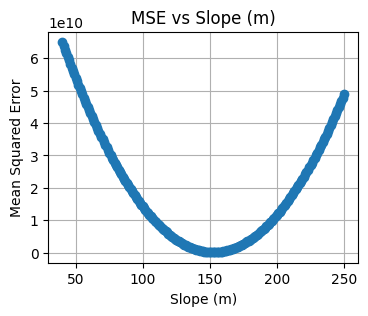

In [33]:
def calculate_mse(m, df, b=40000):
    """
    Calculate Mean Squared Error for a given slope (m) and DataFrame.
    Uses intercept b (default 40000).
    """
    predictions = df['SquareFeet'] * m + b
    return mse(df['Price'], predictions)

# Generate MSE values for m in range 40 to 250
m_values = np.arange(40, 251)
mse_values = [calculate_mse(m_val, df) for m_val in m_values]

# Plot the MSE curve
plt.figure(figsize=(8, 5))
plt.plot(m_values, mse_values, marker='o')
plt.xlabel('Slope (m)')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Slope (m)')
plt.grid(True)
plt.gcf().set_size_inches(4, 3)
plt.show()